In [1]:
from rdkit import Chem
import numpy as np
import pandas as pd
from IPython.display import display
import tqdm

# Load simulator data

In [2]:
dataset = pd.read_csv("/home/abhor/Desktop/repos/ReactionRL/datasets/my_uspto/action_dataset.csv", index_col=0)

In [3]:
dataset

,reactants,products,rsig,psig,rsub,psub,rcen,pcen,rbond,pbond,rsig_clusters
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],2,3,[[1.0]],[[1.0]],0
8174,CCc1nc(C(F)(F)F)ccc1C(=O)N(C)OC,CCc1nc(C(F)(F)F)ccc1C=O,[cH:0]1[n:1][cH:2][cH:3][cH:4][c:5]1[C:6](=[O:...,[H:0],[NH:8]([CH3:9])[O:10][CH3:11],[H:0],8,0,[[1.0]],[[1.0]],0
25624,CON(C)C(=O)c1ccc(Cl)nc1N,COc1cc(C)c(F)cc1C(=O)c1ccc(Cl)nc1N,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...,2,9,[[1.0]],[[1.0]],0
27114,CON(C)C(=O)c1cccnc1Cl,CC(=O)c1cccnc1Cl,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][C:1](=[O:2])[c:3]1[cH:4][cH:5][cH:6][n...,[CH3:0][O:1][NH:2][CH3:3],[CH4:0],2,0,[[1.0]],[[1.0]],0
68734,CON(C)C(=O)c1ccc(Cl)nc1,COc1ccccc1C(=O)c1ccc(Cl)nc1,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][c:7...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1,2,7,[[1.0]],[[1.0]],0
...,...,...,...,...,...,...,...,...,...,...,...
448267,O=C1c2ccccc2C(=O)N1CCS(=O)(=O)Cl,CCN1C(=O)c2ccccc2C1=O,[CH3:0][CH2:1][S:2](=[O:3])(=[O:4])[Cl:5],[H:0],[SH:2](=[O:3])(=[O:4])[Cl:5],[H:0],2,0,[[1.0]],[[1.0]],396936
448392,CCNC(=O)n1nc(N)c2cc(C(F)(F)F)ccc21,CCN=C=O,[CH3:0][NH:1][C:2](=[O:3])[n:4]1[n:5][c:6]([NH...,[CH3:0][N:1]=[C:2]=[O:3],[CH:2](=[O:3])[n:4]1[n:5][c:6]([NH2:7])[c:8]2[...,[CH2:2]=[O:3],2,2,[[1.0]],[[2.0]],397025
448417,O=P(C(F)(F)C(F)(F)F)(C(F)(F)C(F)(F)F)C(F)(F)C(...,O=P([O-])(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F,[O:0]=[P:1]([CH3:2])([CH3:3])[C:4]([F:5])([F:6...,[O:0]=[P:1]([O-:2])([CH3:3])[CH3:4],[CH:4]([F:5])([F:6])[C:7]([F:8])([F:9])[F:10],[O-:2],4,2,[[1.0]],[[1.0]],397046
448458,CCOc1ccc(C(C)(C)COCc2ccc(F)c(Oc3ccccc3)c2)cc1,CCOc1ccc(C(C)(C)CO)cc1,[CH3:0][O:1][CH2:2][c:3]1[cH:4][cH:5][c:6]([F:...,[H:0],[CH3:2][c:3]1[cH:4][cH:5][c:6]([F:7])[c:8]([O:...,[H:0],2,0,[[1.0]],[[1.0]],397075


In [4]:
# I had done this before but some are still there somehow
dataset = dataset[dataset["rbond"]!="[[]]"]
dataset = dataset[dataset["pbond"]!="[[]]"]

In [5]:
dataset

,reactants,products,rsig,psig,rsub,psub,rcen,pcen,rbond,pbond,rsig_clusters
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],2,3,[[1.0]],[[1.0]],0
8174,CCc1nc(C(F)(F)F)ccc1C(=O)N(C)OC,CCc1nc(C(F)(F)F)ccc1C=O,[cH:0]1[n:1][cH:2][cH:3][cH:4][c:5]1[C:6](=[O:...,[H:0],[NH:8]([CH3:9])[O:10][CH3:11],[H:0],8,0,[[1.0]],[[1.0]],0
25624,CON(C)C(=O)c1ccc(Cl)nc1N,COc1cc(C)c(F)cc1C(=O)c1ccc(Cl)nc1N,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...,2,9,[[1.0]],[[1.0]],0
27114,CON(C)C(=O)c1cccnc1Cl,CC(=O)c1cccnc1Cl,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][C:1](=[O:2])[c:3]1[cH:4][cH:5][cH:6][n...,[CH3:0][O:1][NH:2][CH3:3],[CH4:0],2,0,[[1.0]],[[1.0]],0
68734,CON(C)C(=O)c1ccc(Cl)nc1,COc1ccccc1C(=O)c1ccc(Cl)nc1,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][c:7...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1,2,7,[[1.0]],[[1.0]],0
...,...,...,...,...,...,...,...,...,...,...,...
448267,O=C1c2ccccc2C(=O)N1CCS(=O)(=O)Cl,CCN1C(=O)c2ccccc2C1=O,[CH3:0][CH2:1][S:2](=[O:3])(=[O:4])[Cl:5],[H:0],[SH:2](=[O:3])(=[O:4])[Cl:5],[H:0],2,0,[[1.0]],[[1.0]],396936
448392,CCNC(=O)n1nc(N)c2cc(C(F)(F)F)ccc21,CCN=C=O,[CH3:0][NH:1][C:2](=[O:3])[n:4]1[n:5][c:6]([NH...,[CH3:0][N:1]=[C:2]=[O:3],[CH:2](=[O:3])[n:4]1[n:5][c:6]([NH2:7])[c:8]2[...,[CH2:2]=[O:3],2,2,[[1.0]],[[2.0]],397025
448417,O=P(C(F)(F)C(F)(F)F)(C(F)(F)C(F)(F)F)C(F)(F)C(...,O=P([O-])(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F,[O:0]=[P:1]([CH3:2])([CH3:3])[C:4]([F:5])([F:6...,[O:0]=[P:1]([O-:2])([CH3:3])[CH3:4],[CH:4]([F:5])([F:6])[C:7]([F:8])([F:9])[F:10],[O-:2],4,2,[[1.0]],[[1.0]],397046
448458,CCOc1ccc(C(C)(C)COCc2ccc(F)c(Oc3ccccc3)c2)cc1,CCOc1ccc(C(C)(C)CO)cc1,[CH3:0][O:1][CH2:2][c:3]1[cH:4][cH:5][c:6]([F:...,[H:0],[CH3:2][c:3]1[cH:4][cH:5][c:6]([F:7])[c:8]([O:...,[H:0],2,0,[[1.0]],[[1.0]],397075


In [6]:
from rdkit.Chem import rdFMCS

def mol_with_atom_index( mol ):
    '''
    draw molecule with index
    '''
    colored = False
    if hasattr(mol, "__sssAtoms"):
        sss = mol.__sssAtoms
        colored = True
    mol = Chem.Mol(mol)
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    if colored:
        mol.__sssAtoms = sss
    return mol

def smiles_without_atom_index( smiles ):
    '''
    Convert smiles with numbers to smiles without numbers
    '''
    mol = Chem.MolFromSmiles(smiles)
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).ClearProp( 'molAtomMapNumber' )
    return Chem.MolToSmiles(mol)

def mol_without_atom_index(mol):
    '''
    Convert smiles with numbers to smiles without numbers
    '''
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).ClearProp( 'molAtomMapNumber' )
    return mol


def find_connecting_atoms_not_in_sig(mol, sig_indices, centre):
    cen_atom = mol.GetAtomWithIdx(centre)
    neighbors_indices = list(map(lambda x: x.GetIdx(), cen_atom.GetNeighbors()))
    return set(neighbors_indices) - set(sig_indices)

def GetAtomWithAtomMapNum(mol, num):
    for atom in mol.GetAtoms():
        if atom.GetAtomMapNum() == num:
            return atom
    return None

def get_cs_indices(input_mol, psig, rsig_match, rcen, pcen, debug=False):
    '''
    Find mcs between mol1 and mol2 and get indices in mol1 and mol2 corresponding to the cs 
    Returns (mol1 indices), (mol2 indices)
    '''
    # find mcs
    mcs = rdFMCS.FindMCS([input_mol, psig])
    cs = Chem.MolFromSmarts(mcs.smartsString)
    
    if debug:
        print("cs")
        display(cs)
        
    # Get initial cs indices
    input_mol_cs_indices = np.array(rsig_match)[list(Chem.Mol(rsig).GetSubstructMatch(cs))].tolist()
    if not input_mol_cs_indices:
        input_mol_cs_indices = np.array(rsig_match)[list(Chem.Mol(rsig).GetSubstructMatch(cs))].tolist()
    psig_cs_indices = Chem.Mol(psig).GetSubstructMatches(cs)
    
    if debug:
        print("psig_cs_indices(before)", psig_cs_indices)
    
    # if there's more than 1 match, choose the one which has one 1 neighbor
    if len(psig_cs_indices) == 1:
        psig_cs_indices = psig_cs_indices[0]
    else:
        if debug:
            print(list(map(lambda x: (set(add_immediate_neighbors(psig, x, add_aromatic_cycles=False)), set(x)), psig_cs_indices)))
        psig_cs_indices = list(filter(lambda x: len(set(add_immediate_neighbors(psig, x, add_aromatic_cycles=False)) - set(x))==1, psig_cs_indices))[0]
    
    if debug:
        print("psig_cs_indices(after)", psig_cs_indices)
    
    if debug:
        display(mol_with_atom_index(input_mol))
    
    # If CS is only a benzene ring, the substructure matching can give a wrong ordering due to the symmetric nature of benzene. 
    # So I find the atom connecting to the centre and rotate one of the indices to match the other
    if Chem.MolToSmarts(cs) == '[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1':
        if debug:
            print("CS is benzene. Doing extra calculations for index matching...")
        def connecting_atom_idx_in_indices(mol, cen, indices):
            cen_atom = mol.GetAtomWithIdx(int(cen))
            cen_neighbors = list(map(lambda x: x.GetIdx(), cen_atom.GetNeighbors()))
            connecting_atoms = set(cen_neighbors).intersection(set(indices))
            assert len(connecting_atoms) == 1, f"Expecting 1 connecting atom. Found {len(connecting_atoms)}"
            return list(connecting_atoms)[0]
        
        in_mol_connecting_idx = connecting_atom_idx_in_indices(input_mol, rsig_match[rcen], input_mol_cs_indices)
        psig_connecting_idx = connecting_atom_idx_in_indices(psig, pcen, psig_cs_indices)
        
        a = np.argmin(np.abs(np.array(input_mol_cs_indices) - in_mol_connecting_idx))
        b = np.argmin(np.abs(np.array(psig_cs_indices) - psig_connecting_idx))
        
        if debug:
            print(in_mol_connecting_idx, "<--->", psig_connecting_idx)
            print("Rotating....")
            print(f"a={a}, b={b}")
            print("Before")
            print(input_mol_cs_indices)
            print(psig_cs_indices)

        if a < b:
            # left rotate psig idx
            psig_cs_indices = psig_cs_indices[b-a:] + psig_cs_indices[:b-a]
        elif b < a:
            # left rotate in_mol idx
            input_mol_cs_indices = input_mol_cs_indices[a-b:] + input_mol_cs_indices[:a-b]
        
        if debug:
            print("After")
            print(input_mol_cs_indices)
            print(psig_cs_indices)
    
    return input_mol_cs_indices, psig_cs_indices
    

# Dump the cs indices for rsig and psig in database so that we don't have to compute again for each state

# For psig="[H:0]", MCS doesn't work. So for now, I'm removing all such actions
# The easiest way to deal with these actions is to have another routine for "apply_action" which removes rsub (there's nothing to add since psub is Hydrogen)
dataset = dataset[dataset["psig"]!="[H:0]"]

dataset.loc[:, "rsig_cs_indices"] = [-1] * dataset.shape[0]
dataset.loc[:, "psig_cs_indices"] = [-1] * dataset.shape[0]

# Store cs indices in dataset so that we don't have to compute every time
for i in tqdm.tqdm(range(0, dataset.shape[0])):
    rsig = Chem.MolFromSmiles(dataset.iloc[i]["rsig"])
    psig = Chem.MolFromSmiles(dataset.iloc[i]["psig"])
    rsig_match = list(range(rsig.GetNumAtoms()))
    rcen = dataset.iloc[i]["rcen"]
    pcen = dataset.iloc[i]["pcen"]
    
    try:
        r_cs, p_cs = get_cs_indices(rsig, psig, rsig_match, rcen, pcen)
        dataset["rsig_cs_indices"].iloc[i] = ".".join(list(map(str, r_cs)))
        dataset["psig_cs_indices"].iloc[i] = ".".join(list(map(str, p_cs)))
    except Exception as e:
        pass

dataset = dataset[dataset["rsig_cs_indices"] != -1]
print("New shape for dataset:", dataset.shape)
print("Dumping...")
dataset.to_csv("/home/abhor/Desktop/repos/ReactionRL/datasets/my_uspto/action_dataset-updated.csv")

In [7]:
dataset = pd.read_csv("/home/abhor/Desktop/repos/ReactionRL/datasets/my_uspto/action_dataset-updated.csv", index_col=0)

In [8]:
dataset

,reactants,products,rsig,psig,rsub,psub,rcen,pcen,rbond,pbond,rsig_clusters,rsig_cs_indices,psig_cs_indices
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],2,3,[[1.0]],[[1.0]],0,4.5.6.7.8.9.10.11,4.5.6.7.8.9.10.11
25624,CON(C)C(=O)c1ccc(Cl)nc1N,COc1cc(C)c(F)cc1C(=O)c1ccc(Cl)nc1N,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][O:1][c:2]1[cH:3][c:4]([CH3:5])[c:6]([F...,2,9,[[1.0]],[[1.0]],0,4.5.6.7.8.9.10.11,10.11.12.13.14.15.16.17
27114,CON(C)C(=O)c1cccnc1Cl,CC(=O)c1cccnc1Cl,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][C:1](=[O:2])[c:3]1[cH:4][cH:5][cH:6][n...,[CH3:0][O:1][NH:2][CH3:3],[CH4:0],2,0,[[1.0]],[[1.0]],0,4.5.6.7.8.9.10.11,1.2.3.4.5.6.7.8
68734,CON(C)C(=O)c1ccc(Cl)nc1,COc1ccccc1C(=O)c1ccc(Cl)nc1,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][c:7...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][O:1][c:2]1[cH:3][cH:4][cH:5][cH:6][cH:7]1,2,7,[[1.0]],[[1.0]],0,4.5.6.7.8.9.10.11,8.9.10.11.12.13.14.15
103109,CON(C)C(=O)c1cc(Br)cnc1N,Nc1ncc(Br)cc1C(=O)c1ccccc1OC(F)(F)F,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[cH:0]1[n:1][cH:2][cH:3][cH:4][c:5]1[C:6](=[O:...,[CH3:0][O:1][NH:2][CH3:3],[cH:8]1[cH:9][cH:10][cH:11][cH:12][c:13]1[O:14...,2,8,[[1.0]],[[1.0]],0,4.5.6.7.8.9.10.11,6.7.5.4.3.2.1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447992,CCN(CC)C(=O)c1ccc2c(c1)Oc1ccc(F)cc1C2=C1CC2CCC...,O=C(O)C(F)(F)F,[CH3:0][CH2:1][N:2]([CH2:3][CH3:4])[C:5](=[O:6...,[O:0]=[C:1]([OH:2])[CH3:3],[CH3:0][CH2:1][N:2]([CH2:3][CH3:4])[C:5](=[O:6...,[OH2:2],29,2,[[1.0]],[[1.0]],396747,6.5.7,0.1.3
448064,CNC(=O)c1cc2c(Oc3ccc(NC(=S)NC(=O)Cc4cccc(OC)c4...,COc1cccc(CC(=O)N=C=S)c1,[CH3:0][NH:1][C:2](=[O:3])[c:4]1[cH:5][c:6]2[c...,[CH3:0][N:1]=[C:2]=[S:3],[CH3:0][NH:1][C:2](=[O:3])[c:4]1[cH:5][c:6]2[c...,[CH2:2]=[S:3],14,2,[[1.0]],[[2.0]],396793,0.1,0.1
448104,CC(O)(CC(=O)O)CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(...,CC(O)(CCO)CC(=O)[O-],[CH3:0][CH2:1][C:2](=[O:3])[S:4][CH2:5][CH2:6]...,[CH3:0][CH2:1][CH2:2][OH:3],[CH:2](=[O:3])[S:4][CH2:5][CH2:6][NH:7][C:8](=...,[CH3:2][OH:3],2,2,[[1.0]],[[1.0]],396820,15.17.20.21,0.1.2.3
448392,CCNC(=O)n1nc(N)c2cc(C(F)(F)F)ccc21,CCN=C=O,[CH3:0][NH:1][C:2](=[O:3])[n:4]1[n:5][c:6]([NH...,[CH3:0][N:1]=[C:2]=[O:3],[CH:2](=[O:3])[n:4]1[n:5][c:6]([NH2:7])[c:8]2[...,[CH2:2]=[O:3],2,2,[[1.0]],[[2.0]],397025,0.1,0.1


# Indexing 

First, we create index for rsub to make for faster searching.

Searching will be based on rsub because the action searching algorithm cannot create rsigs. rsigs will be used for substructure matching.

In [9]:
import networkx as nx

In [10]:
# Fetch the rsigs using the clusters
rsig_cluster_to_rsig_d = {}
for cluster_id in dataset["rsig_clusters"].unique():
    cluster_df = dataset[dataset["rsig_clusters"] == cluster_id]
    rsig  = Chem.MolFromSmiles(cluster_df.iloc[0]["rsig"])
    rsig_cluster_to_rsig_d[cluster_id] = rsig
    
print(f"There are {len(rsig_cluster_to_rsig_d)} unique (rsigs)rsigs.")

There are 27829 unique (rsigs)rsigs.


In [11]:
from rdkit.Chem import AllChem

def get_mol_certificate(mol):
    return AllChem.GetMorganFingerprintAsBitVect(mol, 2).ToBase64()

In [12]:
certificate_to_cluster_id_dict = {}
for _id in tqdm.tqdm(rsig_cluster_to_rsig_d):
    C = get_mol_certificate(rsig_cluster_to_rsig_d[_id])
    if C in certificate_to_cluster_id_dict:
        certificate_to_cluster_id_dict[C].append(_id)
    else:
        certificate_to_cluster_id_dict[C] = [_id]

print("Len of dict =", len(certificate_to_cluster_id_dict))

100%|███████████████████████████████████████████████████████| 27829/27829 [00:00<00:00, 40869.05it/s]

Len of dict = 25719


# Action searching

The action searching algorithm has following steps:  
1. Find cut vertices
2. For each connected component + cut vertex, do index search on rsub
3. If MatchFound(), do substructure match on rsig

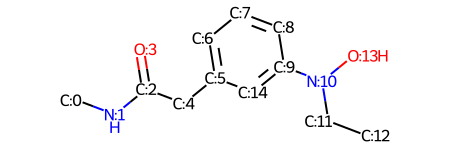

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 14])

In [13]:
def add_immediate_neighbors(mol, indices, add_aromatic_cycles=True):
    def _add_neighbors(idx_list):
        atoms = list(map(lambda x: mol.GetAtomWithIdx(int(x)), idx_list))
        neighbors = []
        for atom in atoms:
            neighbors.extend(list(map(lambda x: x.GetIdx(), atom.GetNeighbors())))
        return np.unique(neighbors).tolist()
    
    # first add immediate neighbors
    new_indices = _add_neighbors(indices)
    
    if set(new_indices) == set(indices): # indices = whole molecule
        return indices
    
    # if added neighbor is aromatic, we have to check for more neighbors (if I do not add this condition, it does neighbor+1)
    if add_aromatic_cycles and any(list(map(lambda idx: mol.GetAtomWithIdx(idx).GetIsAromatic(), list(set(new_indices) - set(indices))))):
        indices = list(new_indices)
        # if any aromtic atoms in neighbors, add them as well
        repeat = True
        while repeat:
            repeat = False
            for n in set(_add_neighbors(indices)) - set(indices):
                if mol.GetAtomWithIdx(int(n)).GetIsAromatic():
                    indices.append(n)
                    repeat = True
    else:
        indices = new_indices
    
    return np.unique(indices)
    
mol = Chem.MolFromSmiles("CNC(=O)Cc1cccc(N(CC)O)c1")
display(mol_with_atom_index(mol))
add_immediate_neighbors(mol, [0, 1, 2, 3, 4])

In [14]:
def verify_action_applicability(mol, r_indices, cluster_id, debug=False):
    mol = Chem.Mol(mol)
    rsig = Chem.MolFromSmiles(dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]["rsig"])
    rsub = Chem.MolFromSmiles(dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]["rsub"])
    rcen = dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]["rcen"]
    rbond = dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]["rbond"]
    rbond = list(map(float, rbond.replace("[", "").replace("]", "").replace(" ", "").split(",")))
            
    if debug:
        print("#"*100)
        print(cluster_id, rbond)
        print("\n\n\n")
        display(mol_with_atom_index(mol))
        display(rsig)
        display(rsub)
        print("r_idx, rcen", r_indices, rcen)
    # Get the correct rsig_match
    rsig_matches = mol.GetSubstructMatches(rsig)
    if not rsig_matches:
        rsig_match = ()
    else:
        for rsig_match in rsig_matches:
            if not (set(rsig_match) - set(r_indices)):
                break
    
    if debug:
        print("rsig_match", rsig_match)
    
    # Get the correct rsub_match(s)
#     temp_rsub_matches = mol.GetSubstructMatches(rsub)
    
    atm_map_nums = []
    for i in range(rsub.GetNumAtoms()):
        atm_map_nums.append(rsub.GetAtomWithIdx(i).GetAtomMapNum())
    if debug:
        print("atm_map_nums", atm_map_nums)
        
    try:
        rsub_match = np.array(rsig_match)[atm_map_nums].tolist() # no rsig match found
    except Exception as e:
        return False
    if debug:
        print("rsub_match", rsub_match)
    
#     print("temp_rsub_matches", temp_rsub_matches)
#     rsub_matches = []    
#     for rsub_match in temp_rsub_matches:
#         if not (set(rsub_match) - set(r_indices)):
#             print("inside")
#             atoms = list(map(lambda x: mol.GetAtomWithIdx(int(x)), rsub_match))
#             neighbors = []
#             bonds = []
#             for atom in atoms:
#                 _n = list(map(lambda x: x.GetIdx(), atom.GetNeighbors()))
#                 neighbors.extend(_n)
#                 bonds.extend(list(map(lambda x: mol.GetBondBetweenAtoms(atom.GetIdx(), int(x)).GetBondTypeAsDouble(), list(set(_n).intersection(set(r_indices))-set(rsub_match)))))
#             # neighbors should be in r_indices
#             if set(neighbors) - set(r_indices):
#                 print("neighbors, r_indices", neighbors, r_indices)
#                 continue
            
#             # Connecting bond(s) should be correct
#             if not set(rbond) == set(bonds):
#                 print("rbond, bonds", rbond, bonds)
#                 continue
            
#             rsub_matches.append(rsub_match)
    
    # is there is a rsub whose neighbors are in rsig_match, we're good
#     result = False
#     for rsub_match in rsub_matches:
    # get neighbors
    atoms = list(map(lambda x: mol.GetAtomWithIdx(x), rsub_match))
    neighbors = []
    for atom in atoms:
        neighbors.extend(list(map(lambda x: x.GetIdx(), atom.GetNeighbors())))
    neighbors = np.unique(neighbors)
    if debug:
        print("neighbors", neighbors)
    if not set(neighbors) - set(rsig_match):
        if debug:
            print(True)
        return True
    if debug:
        print(False)
    return False
    if debug:
        print("#"*100)
    return result
    
def get_mol_from_index_list(mol, indices):
    rw = Chem.RWMol(mol)
    rw.BeginBatchEdit()
    for idx in set(list(range(mol.GetNumAtoms()))) - set(indices):
        rw.RemoveAtom(idx)
    rw.CommitBatchEdit()
    return Chem.Mol(rw)

### For a new molecule, let's find all possible actions applicable

In [15]:
%%time
def get_applicable_rsig_clusters(in_mol):
    # For each cut vertex, we find two disconnected components and search the smaller one in our index
    G = nx.from_numpy_matrix(Chem.GetAdjacencyMatrix(in_mol))
    applicable_actions = []

    for x in nx.articulation_points(G):
        # Remove atom (not directly, otherwise the index resets)
        # First remove bonds to x
        in_mol_kekulized = Chem.Mol(in_mol)
        Chem.Kekulize(in_mol_kekulized, clearAromaticFlags=True)
        mw = Chem.RWMol(in_mol_kekulized)
        for n in mw.GetAtomWithIdx(x).GetNeighbors():
            mw.RemoveBond(x, n.GetIdx())

        # Find fragments
        mol_frags = list(Chem.rdmolops.GetMolFrags(mw))

        # Remove x from fragments
        mol_frags.remove((x,))

        # For each fragment except the biggest, add x and extract sub-molecule and search
        for frag in sorted(mol_frags, key=lambda x: len(x))[:-1]:
            indices = [x] + list(frag)

            for _ in range(2):
                # we add neighbors twice to rsub and then search for rsig
                indices = add_immediate_neighbors(in_mol, indices)
                candidate = get_mol_from_index_list(in_mol_kekulized, indices)
#                 Chem.Kekulize(candidate)
                try:
                    Chem.SanitizeMol(candidate)
                except Exception as e:
                    print(e)
                if _debug:
                    print(Chem.MolToSmiles(candidate))
                    display(mol_with_atom_index(candidate))

                # get certificate and search in rsig
                cand_certi = get_mol_certificate(candidate)
                if _debug:
                    print(cand_certi)

                if cand_certi in certificate_to_cluster_id_dict:
                    # Verify rsig
                    for cluster_id in certificate_to_cluster_id_dict[cand_certi]:
                        if _debug:
                            print(cluster_id)
#                         if cluster_id != my_ultimate_cluster:
#                             continue
                        if _debug:
                            print("Verification...", cluster_id)
                        if verify_action_applicability(in_mol, indices, cluster_id, _debug):
                            if cluster_id not in applicable_actions:
#                                 row = dataset[dataset["rsig_clusters"]==cluster_id].iloc[0]
#                                 print(row)
#                                 print(indices, x)
#                                 display(mol_with_atom_index(Chem.MolFromSmiles(row["reactants"])))
#                                 display(mol_with_atom_index(Chem.MolFromSmiles(row["products"])))
#                                 display(mol_with_atom_index(Chem.MolFromSmiles((row["rsig"]))))
#                                 display(mol_with_atom_index(candidate))
                                applicable_actions.append(cluster_id)
    return applicable_actions
                
    
not_working = []
error_cases = []
x = 100
_debug = False
for i in tqdm.tqdm(range(x, dataset.shape[0])):
    row = dataset.iloc[i]
    in_mol = Chem.MolFromSmiles(row["reactants"])
    my_ultimate_cluster = row["rsig_clusters"]
    rsig_clusters = get_applicable_rsig_clusters(in_mol)
    print(rsig_clusters)
#     try:

#         if my_ultimate_cluster not in rsig_clusters:  
# #             _debug = True
# #             print(i)
# #             print(row)
# #             print("in mol")
# #             display(in_mol)
# #             print("rsig")
# #             display(Chem.MolFromSmiles(row["rsig"]))
# #             print("original certi")
# #             print(get_mol_certificate(Chem.MolFromSmiles(row["rsig"])))
# #             print(row["rsig"])
# #             get_applicable_rsig_clusters(in_mol)
# #             break
#             not_working.append(i)
# #             print(i, my_ultimate_cluster, rsig_clusters)
# #             print(i, len(not_working), len(error_cases))
            
#     except Exception as e:
#         print(e)
#         error_cases.append(i)
    break

  0%|                                                                     | 0/122348 [00:00<?, ?it/s]

[11667, 88, 1469, 2542, 5440]
CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 39.2 ms


In [16]:
i = error_cases[10]
_debug = True

row = dataset.iloc[i]
in_mol = Chem.MolFromSmiles(row["reactants"])
my_ultimate_cluster = row["rsig_clusters"]

print(i)
print("in mol")
display(in_mol)
print("product mol")
display(Chem.MolFromSmiles(row["products"]))
rsig = Chem.MolFromSmiles(row["rsig"])
print("rsig")
display(rsig)
print(get_mol_certificate(rsig))
print("rcen")
print(row["rcen"])
print("rsub")
display(Chem.MolFromSmiles(row["rsub"]))
print()


print("$"*150)
print(my_ultimate_cluster, get_applicable_rsig_clusters(in_mol))

IndexError: list index out of range

In [ ]:
len(not_working), len(error_cases)

# Some stats for the action searching
count = 0
cluster_count = 0
action_count = 0
time_taken = 0

import time
for i in tqdm.tqdm(range(50000)):
    t = time.time()
    clusters = get_applicable_rsig_clusters(Chem.MolFromSmiles(dataset.iloc[i]["reactants"]))
    cluster_count += len(clusters)
    action_count += len(dataset[dataset["rsig_clusters"].isin(clusters)])
    time_taken += (time.time() - t)
    count += 1
#     break
    
print(f"Avg cluster count = {cluster_count/count}")
print(f"Avg action count = {action_count/count}")
print(f"Avg time taken = {time_taken/count}")

# Applying actions

In [27]:
import re
def clean_smiles(smiles):
    '''
    Some clean-ups Idk how to do in molecule. So I do it in smiles after conversion.
    1. Remove extra hydrogens for even sized rings
    '''
    return re.sub("\[([a-zA-Z])H[0-9]\]", r"\1", smiles)
    
clean_smiles("O=C(NN1CCCN(c2ccc(Cl)cc2)C1=O)[cH3]1c(F)ccc(NS(=O)(=O)CCCF)c1F")

'O=C(NN1CCCN(c2ccc(Cl)cc2)C1=O)c1c(F)ccc(NS(=O)(=O)CCCF)c1F'

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Input molecule (i = 4330), (j = 4330)


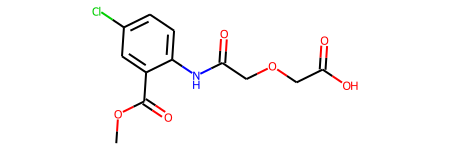

Random rsig chosen (rcen = 1)


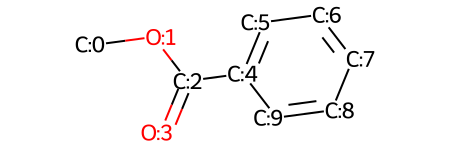

Random psig chosen (pcen = 6)


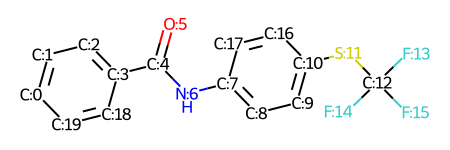

----------------------------------------------------------------------------------------------------
Original reactant


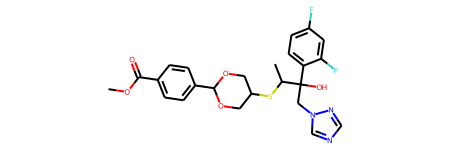

Original product


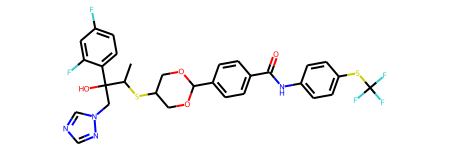

----------------------------------------------------------------------------------------------------
rcen= 1
rsub


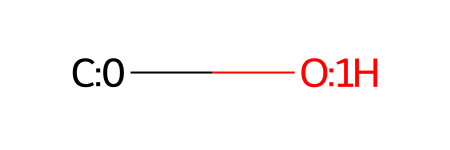

rsig


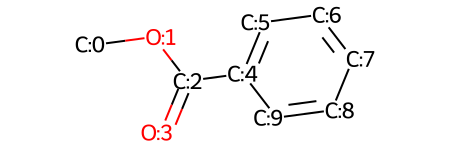

pcen= 6
psub


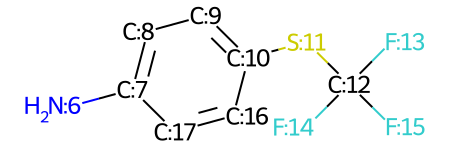

psig


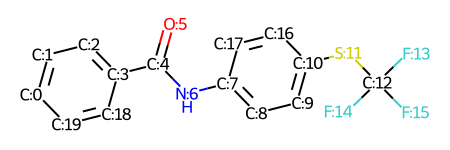

((0, 1, 2, 3, 4, 5, 6, 8, 9, 10),)
Input mol


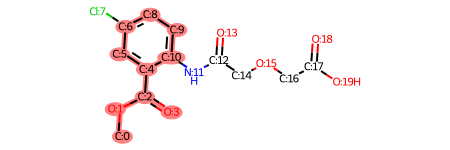

rsig_match (0, 1, 2, 3, 4, 5, 6, 8, 9, 10)
rsig_cs_indices [2, 3, 4, 5, 6, 7, 8, 9]
input_mol_cs_indices [2, 3, 4, 5, 6, 8, 9, 10]
psig_cs_indices [4, 5, 3, 2, 1, 0, 19, 18]
rwmol with atom map nums


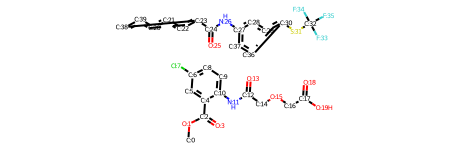

rwmol with indices


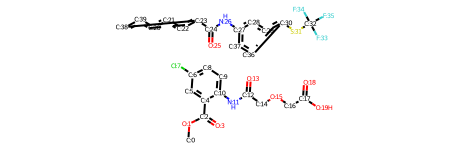

cs indices: [2, 3, 4, 5, 6, 8, 9, 10] [4, 5, 3, 2, 1, 0, 19, 18]
atom map nums: [2, 3, 4, 5, 6, 8, 9, 10] [24, 25, 23, 22, 21, 20, 39, 38]
2 24 2 24
set()
3 25 3 25
set()
4 23 4 23
set()
5 22 5 22
set()
6 21 6 21
{7}
6 21 7


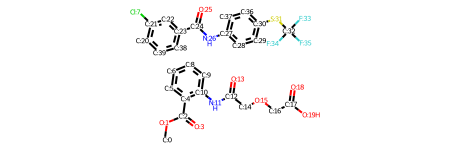

8 20 8 20
set()
9 39 9 39
set()
10 38 10 38
{11}
10 38 11


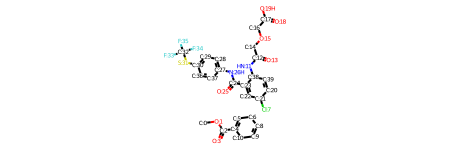

After removal


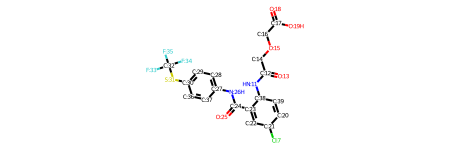

Pre-cleaning smiles: O=C(O)COCC(=O)Nc1ccc(Cl)cc1C(=O)Nc1ccc(SC(F)(F)F)cc1
Final mol
O=C(O)COCC(=O)Nc1ccc(Cl)cc1C(=O)Nc1ccc(SC(F)(F)F)cc1


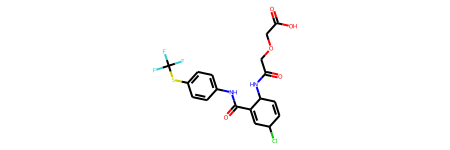

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [94]:
def filter_sensible_rsig_matches(mol, rsig_matches, rsig, rsub, rcen):
    '''
    Checks if the rsub in given rsig only has neighbors within rsig (if there are neighbors outside rsig, then this is not a valid rsub by definition of its creation (rsig = rsub + 2 neighbors))
    '''
    # Get the atoms in rsig corresponding to rsub
    rsub_atom_indices = []
    for atom in rsub.GetAtoms():
        rsub_atom_indices.append(atom.GetAtomMapNum())#GetAtomWithIdx( idx ).GetProp( 'molAtomMapNumber'))
    rsig_atom_indices_in_rsub = list(map(lambda x: GetAtomWithAtomMapNum(rsig, x).GetIdx(), rsub_atom_indices))
    
    # Corresponding atoms in mol should have neighbors inside rsig_matches
    def verify(match):
        neighbors = []
        for idx in rsig_atom_indices_in_rsub:
            corr_idx = match[idx]
            atom = mol.GetAtomWithIdx(corr_idx)
            neighbors.extend(list(map(lambda x: x.GetIdx(), atom.GetNeighbors())))
        if not set(neighbors) - set(match):
            return True
        return False
        
    rsig_matches = list(filter(verify, rsig_matches))
    return rsig_matches

def apply_action(input_mol, rsub, rcen, rsig, rsig_cs_indices, psub, pcen, psig, psig_cs_indices, debug=False):
    # Some basic conversions acc. to dataset format
    input_mol = Chem.Mol(input_mol)
    rsig = Chem.MolFromSmiles(rsig)
    psig = Chem.MolFromSmiles(psig)
    rsig_cs_indices = list(map(int, rsig_cs_indices.split(".")))
    psig_cs_indices = list(map(int, psig_cs_indices.split(".")))
    
    if debug:
        print("rcen=",rcen)
        print("rsub")
        display(Chem.MolFromSmiles(rsub))
        print("rsig")
        display(rsig)
        print("pcen=", pcen)
        print("psub")
        display(Chem.MolFromSmiles(psub))
        print("psig")
        display(psig)
    
    
    # Find rsig in input_mol
    rsig_matches = input_mol.GetSubstructMatches(rsig)
    if debug:
        print(rsig_matches)
    # If multiple matches, choose one where rsub/rcen makes sense
    if len(rsig_matches) > 1:
        rsig_matches = filter_sensible_rsig_matches(input_mol, rsig_matches, rsig, Chem.MolFromSmiles(rsub), rcen)
    
    if debug:
        print("Input mol")
        display(mol_with_atom_index(input_mol))
    # FIXME: Provide option to use more than just the first match
    rsig_match = rsig_matches[0]
    if debug:
        print("rsig_match", rsig_match)

    
    
    # Find indices to be exchanged
    if debug:
        print("rsig_cs_indices", rsig_cs_indices)
    input_mol_cs_indices = np.array(rsig_match)[rsig_cs_indices].tolist()
#     input_mol_cs_indices, psig_cs_indices = get_cs_indices(input_mol, psig, rsig_match, rcen, pcen, debug=True)
    if debug:
        print("input_mol_cs_indices", input_mol_cs_indices)
        print("psig_cs_indices", psig_cs_indices)
    
    # Exchange indices (replace bonds for atoms at given indices)
    rwmol = Chem.RWMol(mol_with_atom_index(input_mol))
    num_atoms = input_mol.GetNumAtoms()
    new_psig = Chem.Mol(psig)
    for atom in new_psig.GetAtoms():
        atom.SetAtomMapNum(atom.GetAtomMapNum() + num_atoms)
    rwmol.InsertMol(Chem.Mol(new_psig))
    if debug:
        print("rwmol with atom map nums")
        display(rwmol)
        print("rwmol with indices")
        display(rwmol)
    
        print("cs indices:", input_mol_cs_indices, psig_cs_indices)
    
    # TODO: FIND A BETTER WAY TO FIND THE INDICES OF THE TWO CONNECTED COMPONENTS
    rsig_cs_atom_map_num = list(input_mol_cs_indices)
    psig_cs_atom_map_num = (np.array(psig_cs_indices)+num_atoms).tolist()
    
    if debug:
        print("atom map nums:", rsig_cs_atom_map_num, psig_cs_atom_map_num)
    for r_an, p_an in zip(rsig_cs_atom_map_num, psig_cs_atom_map_num):
        r_idx = GetAtomWithAtomMapNum(rwmol, r_an).GetIdx()
        p_idx = GetAtomWithAtomMapNum(rwmol, p_an).GetIdx()
        if debug:
            print(r_an, p_an, r_idx, p_idx)
            print(find_connecting_atoms_not_in_sig(input_mol, rsig_match, r_idx))
        for conn in find_connecting_atoms_not_in_sig(input_mol, rsig_match, r_idx):
            if debug:
                print(r_idx, p_idx, conn)
            rwmol.AddBond(p_idx, conn, input_mol.GetBondBetweenAtoms(r_idx, conn).GetBondType())
            rwmol.RemoveBond(r_idx, conn)
            if debug:
                display(rwmol)
            
    # Remove the atoms from rsig
    for atm_num in rsig_match:
        rwmol.RemoveAtom(GetAtomWithAtomMapNum(rwmol, atm_num).GetIdx())
    
    if debug:
        print("After removal")
        display(rwmol)
    
    mol = mol_without_atom_index(Chem.Mol(rwmol)) # with atom number, the molecule ends up invalid after conversion to non-editable(Chem.Mol)
    if debug:
        print("Pre-cleaning smiles:", Chem.MolToSmiles(mol))
    if Chem.MolFromSmiles(Chem.MolToSmiles(mol)) is None:
        mol = Chem.MolFromSmiles(clean_smiles(Chem.MolToSmiles(mol)))
    if debug:
        print("Final mol")
        print(Chem.MolToSmiles(mol))
        display(mol)
    assert Chem.MolFromSmiles(Chem.MolToSmiles(mol)) is not None, "Final mol is not valid"
    assert "." not in Chem.MolToSmiles(mol), "More than 1 molecule in result"
    return mol
    

# for _ in range(10):
i = np.random.randint(0, dataset.shape[0])
i = 4330
input_mol = Chem.MolFromSmiles(dataset.iloc[i]["reactants"])

# Pick a random action from all the possible ones
temp_df = dataset[dataset["rsig_clusters"].isin(get_applicable_rsig_clusters(input_mol))]
if temp_df.shape[0] == 0:
    print("NO ACTIONS APPLICABLE!")
j = int(np.random.random()*temp_df.shape[0])
j = 4330
random_action = temp_df.iloc[j]

print("-"*100)
print("-"*100)
print(f"Input molecule (i = {i}), (j = {j})")
display(input_mol)
print(f"Random rsig chosen (rcen = {random_action['rcen']})")
display(Chem.MolFromSmiles(random_action["rsig"]))
print(f"Random psig chosen (pcen = {random_action['pcen']})")
display(Chem.MolFromSmiles(random_action["psig"]))

# # Original reaction
print("-"*100)
print("Original reactant")
display(Chem.MolFromSmiles(random_action["reactants"]))
print("Original product")
display(Chem.MolFromSmiles(random_action["products"]))
print("-"*100)


apply_action(input_mol, random_action["rsub"], random_action["rcen"], random_action["rsig"], random_action["rsig_cs_indices"],
                     random_action["psub"], random_action["pcen"], random_action["psig"], random_action["psig_cs_indices"], debug=True)
print("-"*100)
print("-"*100)

# Filter actions based on whether they work for some sample cases

dataset.reset_index(inplace=True)

dataset = dataset.drop(columns=["index"])

dataset

import time

# Init/Reset these columns
dataset["reactant_works"] = [True]*dataset.shape[0]
dataset["reactant_tested"] = [False]*dataset.shape[0]

dataset["action_works"] = [True] * dataset.shape[0]
dataset["action_tested"] = [False] * dataset.shape[0]


count = 0
t = time.time()
error_list = []
# while not dataset["action_tested"].all() or not dataset["reactant_tested"].all():
for i in range(dataset.shape[0]):
    in_mol = Chem.MolFromSmiles(dataset.iloc[i]["reactants"])
    dataset["reactant_tested"].iat[i] = True

    # Try out all the actions
    temp_df = dataset[dataset["rsig_clusters"].isin(get_applicable_rsig_clusters(in_mol))]
    if temp_df.shape[0] == 0:
        dataset["reactant_works"].iat[i] = False
    else:
        for j in range(temp_df.shape[0]):
            random_action = temp_df.iloc[j]
            dataset["action_tested"].at[random_action.name] = True
        
            # Try to apply action/
            try:
                apply_action(in_mol, random_action["rsub"], random_action["rcen"], random_action["rsig"], random_action["rsig_cs_indices"],
                                     random_action["psub"], random_action["pcen"], random_action["psig"], random_action["psig_cs_indices"])
            except Exception as e:
                print(i, j)
                
                apply_action(in_mol, random_action["rsub"], random_action["rcen"], random_action["rsig"], random_action["rsig_cs_indices"],
                                     random_action["psub"], random_action["pcen"], random_action["psig"], random_action["psig_cs_indices"], debug=True)
                error_list.append(type(e))
                dataset["action_works"].at[random_action.name] = False
                break
            count += 1
            if count % 1000 == 0:
                print(count, time.time()-t, f"{dataset['reactant_tested'].sum()}({dataset.loc[dataset['reactant_tested']]['reactant_works'].sum()})", 
                                            f"{dataset['action_tested'].sum()}({dataset.loc[dataset['action_tested']]['action_works'].sum()})")
                t = time.time()
# break
